In [34]:
# analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

In [35]:
# encoding is not utf-8 in this dataset hence just running pd.read_csv('dataset.csv) will raise an error
data = pd.read_csv('top50.csv', encoding='ISO-8859-1')
data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


<h1>EDA</h1>

In [36]:
data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [37]:
data.isnull().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [38]:
data.shape

(50, 14)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [40]:
# renaming some columns to make them easier to understand and to use
data.rename(columns={'Track.Name':'Track_Name', 'Artist.Name':'Artist',
                      'Beats.Per.Minute':'Beats_Per_Minute', 'Loudness..dB..':'Loudness',
                      'Valence.':'Valence', 'Length.':'Length', 'Acousticness..':'Acousticness', 'Speechiness.':'Speechiness'}, inplace=True)

data.head()

,Unnamed: 0,Track_Name,Artist,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [41]:
# count of songs as per their genre
data.Genre.value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: Genre, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Genre')

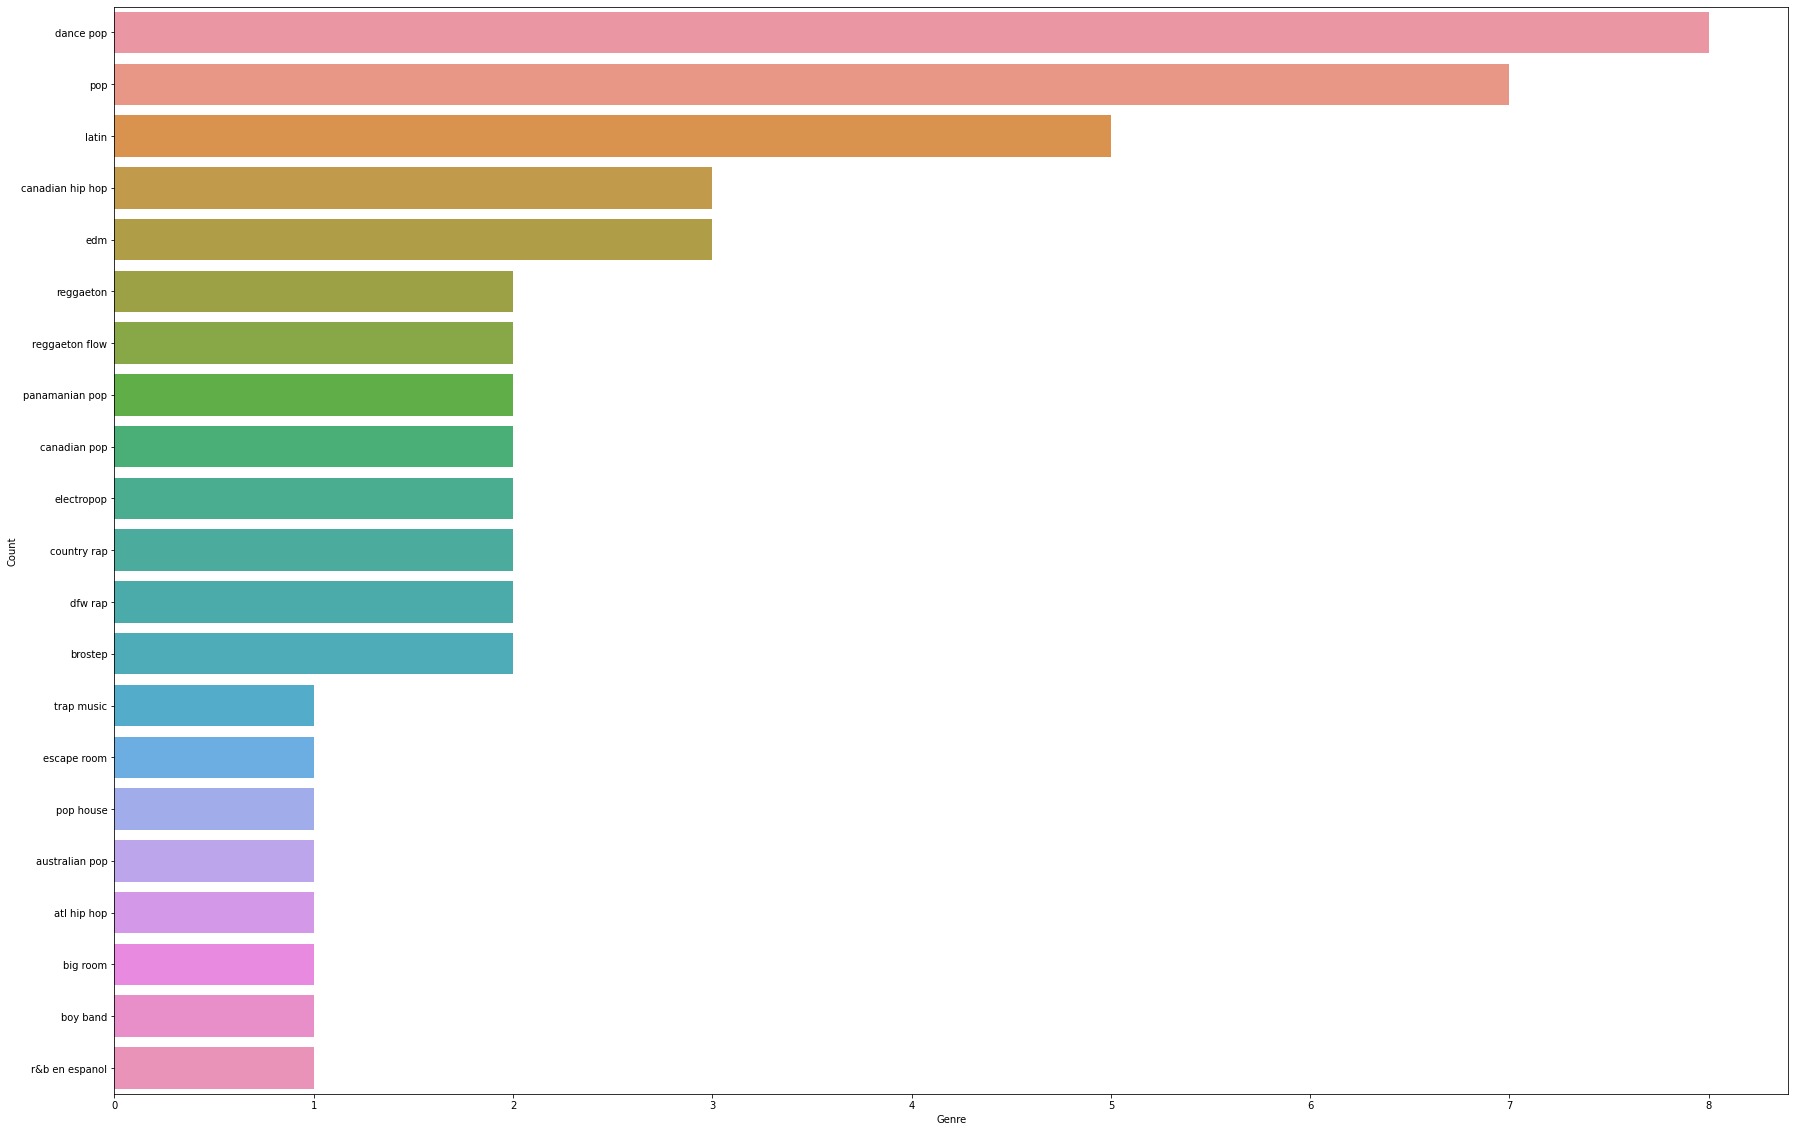

In [42]:
values = data.Genre.value_counts()
index = values.index

fig = plt.figure(figsize = (30, 20))
sns.barplot(values, index)

plt.ylabel('Count')
plt.xlabel('Genre')

In [45]:
data.Artist.value_counts()

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: Artist, dtype: int64

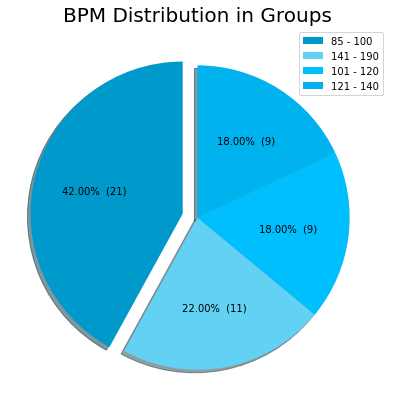

In [66]:
# creating a function to group BPM 

def bpm_group(x):
  if x <= 100:
    return '85 - 100'
  elif x <= 120:
    return '101 - 120'
  elif x <= 140:
    return '121 - 140'
  else:
    return '141 - 190'

bpm_groups = data.Beats_Per_Minute.apply(bpm_group)

values = bpm_groups.value_counts()
labels = values.index
colors = ['#0099CC', '#63D1F4', '#00BFFF', '#00B2EE' ]
explode = (0.1, 0, 0, 0)

# a slighty fancy function to calulate autopct values and display them on the pie plot
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig = plt.figure(figsize = (15, 7))
# plt.pie(values, colors = colors, autopct = '%1.1f%%', startangle = 90, textprops = {'color' : 'w'})
plt.pie(values, colors = colors, explode = explode, autopct = make_autopct(values), startangle = 90, textprops = {'color' : 'k'}, shadow = True)

plt.title('BPM Distribution in Groups', fontsize = 20)
plt.legend(labels)
plt.show()

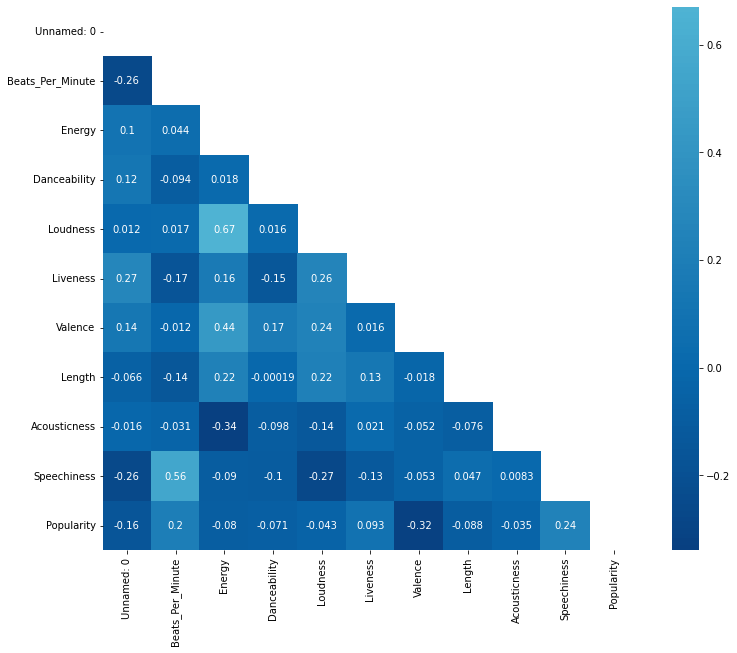

In [75]:
# data correlation map
correlations = data.corr()

# dtype = np.bool is deprecated, so using just bool instead
mask = np.triu(np.ones_like(correlations, dtype=bool))

fig = plt.figure(figsize = (12, 10))
# sns.heatmap(correlations, annot = True, cmap = 'BrBG', center = 1)
sns.heatmap(correlations, annot = True, mask = mask, cmap = 'GnBu_r', center = 1)

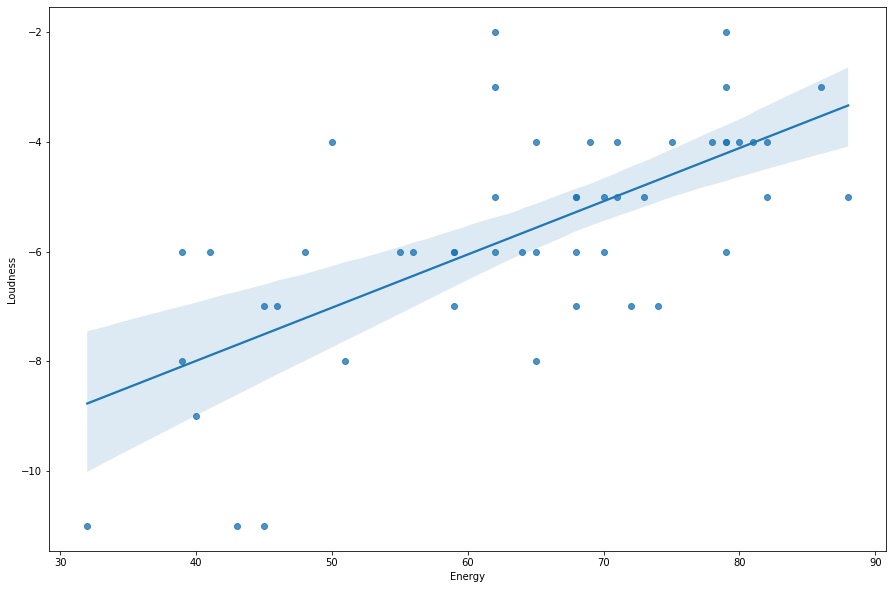

In [76]:
# plot to understand relationship between energy and loudness
fig = plt.figure(figsize=(15, 10))
sns.regplot(x='Energy', y='Loudness', data=data)